In [4]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
import pandas as pd

N = 500  # 設定要爬取文章數

In [5]:
# 透過開發者工具發現也可以利用 API
# api = 'https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=tech_tw&len=500'
# 回傳是 json 文件格式

In [8]:
# 打開瀏覽器, 進入欲爬取網頁
browser = webdriver.Chrome(executable_path='../chromedriver')
browser.get("https://www.cupoy.com/newsfeed/topicgrp/tech_tw")

# 每隔兩秒鐘自動往下滑, 擷取 500 篇新聞的 url
count = 0
articles_info = []

print('目前文章數: ', end='')

while count<N:
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, 'html5lib')
    
    target = soup.find_all('a', class_='sc-jxGEyO')                 # class name 曾經改過, 導致抓不到, 所以要再次確認
    dummy = 0
    
    for d in target:
        article = {}
        article['title']= d['title']
        article['url'] = d['href']
        article['origin'] = '/'.join(d['href'].split('/', 3)[:-1])           # 新聞來源的網站主頁
        
        if article not in articles_info:                  # 如果有因為往下滑的時間延遲造成爬取到重複的新聞
            articles_info.append(article)                 # 設置 dummy 扣除計算數
        else:
            dummy += 1
    
    count = count + len(target) - dummy
    print(count, end=' ')
    
    browser.execute_script("window.scrollTo(0, document.body.scrollHeight);")
    time.sleep(5)

browser.quit()

if len(articles_info) > N:                               # 取前 500 筆
    articles_info = articles_info[:N]

目前文章數: 0 15 15 29 30 40 55 60 76 88 104 117 133 146 162 175 191 204 221 234 251 264 281 294 311 324 341 354 371 384 401 414 431 444 461 474 490 503 

In [9]:
print(len(articles_info))
print()

for i, a in enumerate(articles_info, start=1):                  # 確認 500 筆新聞的標題
    print(i, ' ', a['title'])

500

1   iPhone 13 Pro 和 13 Pro Max 可能會提供 1TB 版本
2   Amazon Kindle 迎來新介面，操作更簡單
3   有指 Android 12 將會在 10 月 4 日推出
4   法國有送、臺灣卻沒有！蘋果IPhone手機取消附贈充電器，消基會將介入調查-風傳媒
5   Razer Orochi V2 開箱評測： 最長 950 小時續航、雙模無線電競滑鼠價格2,090元 | T客邦
6   如何線上觀看蘋果的iPhone 13發表會？ | T客邦
7   蘋果才說不要將 iPhone 裝在重機等強烈震動場合，馬上被網友挖出官方廣告打臉 | T客邦
8   聯想推出 Tab P11 Plus 平板，指定通路購買加送藍牙耳機 | T客邦
9   2021臺北電影節「XR全浸界」：《霧中》窺視男同志情慾，臺灣有史以來尺度最大的VR影片 - The News Lens 關鍵評論網
10   你不需要是布魯斯威利也能靠臉吃飯，Hour One用租來的臉產生deepfake虛擬角色 | T客邦
11   軟體定義汽車需要經久耐用的硬體 | T客邦
12   浪LIVE X 海科大直播培訓課程，分享產業面面觀 | T客邦
13   試用期QA一次看：試用期沒過被解僱，可以領資遣費嗎？ - The News Lens 關鍵評論網
14   用財務理論「跳躍行程」觀察趨勢波動：疫情過後是報復性買房，還是報復性賣房？ - The News Lens 關鍵評論網
15   AI Image Upscaler 使用 AI 放大圖片不降低畫質不失真模糊
16   臺北創業幫舉辦線上論壇，聚焦金融科技和物流科技 | T客邦
17   車險理賠效率對保險公司意味着什麼？ | 機器之心
18   超過1,200所美國K-12學校的學生資料曝露在暗網中 | iThome
19   蘋果警告：把iPhone長期放在震動劇烈之處會影響相機效能 | iThome
20   與沃爾沃達成合作，亞馬遜雲科技「高舉高打」切入汽車行業的初心 | 機器之心
21   蘋果與Epic Games訴訟的判決出爐：不得強迫開發者使用蘋果支付機制 | iThome
22   廣告科技另一衝擊，蘋果新隱私政策讓用戶行為更難追蹤 | iThome
23   Google On

In [10]:
# 轉成 dataframe 並存檔

df = pd.DataFrame(articles_info)
df.head(10)

df.to_csv('news_info.csv', index=False)

In [11]:
# 讀取 csv
news_info = pd.read_csv('news_info.csv')
news_info.head(10)

,title,url,origin
0,iPhone 13 Pro 和 13 Pro Max 可能會提供 1TB 版本,https://chinese.engadget.com/iphone-13-storage...,https://chinese.engadget.com
1,Amazon Kindle 迎來新介面，操作更簡單,https://chinese.engadget.com/amazon-kindle-upd...,https://chinese.engadget.com
2,有指 Android 12 將會在 10 月 4 日推出,https://chinese.engadget.com/android-12-releas...,https://chinese.engadget.com
3,法國有送、臺灣卻沒有！蘋果IPhone手機取消附贈充電器，消基會將介入調查-風傳媒,https://www.storm.mg/lifestyle/3936730,https://www.storm.mg
4,"Razer Orochi V2 開箱評測： 最長 950 小時續航、雙模無線電競滑鼠價格2,...",https://www.techbang.com/posts/88666-razer-oro...,https://www.techbang.com
5,如何線上觀看蘋果的iPhone 13發表會？ | T客邦,https://www.techbang.com/posts/89897-how-do-i-...,https://www.techbang.com
6,蘋果才說不要將 iPhone 裝在重機等強烈震動場合，馬上被網友挖出官方廣告打臉 | T客邦,https://www.techbang.com/posts/89875-apple-has...,https://www.techbang.com
7,聯想推出 Tab P11 Plus 平板，指定通路購買加送藍牙耳機 | T客邦,https://www.techbang.com/posts/89886-lenovo,https://www.techbang.com
8,2021臺北電影節「XR全浸界」：《霧中》窺視男同志情慾，臺灣有史以來尺度最大的VR影片 -...,https://www.thenewslens.com/article/156278,https://www.thenewslens.com
9,你不需要是布魯斯威利也能靠臉吃飯，Hour One用租來的臉產生deepfake虛擬角色 |...,https://www.techbang.com/posts/89503-you-dont-...,https://www.techbang.com


In [12]:
# 以多執行緒爬取每篇新聞內容，比原來以單一執行緒跑完 500 篇節省許多時間

import threading
import requests
import re
from tqdm import tqdm_notebook, tnrange 
#import random

n_thread = 10           # 執行緒數量
news_url = list(news_info['url'].values)
contents = []           # 每個執行緒爬取完結果的串列，長度是執行緒數量
headers = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.66 Safari/537.36'}

# 原本要使用一些代理 ip 避免用原 ip 大量爬取網頁的問題，但這些代理 ip 卻有時候會抓不到正確的新聞內容
# 後來只好還是使用原 ip 只是得在每一筆爬取資料後多加些等待時間
# proxy = ['113.53.83.212:44664', '14.143.168.230:8080', '186.159.3.193:56861',       
#          '163.172.229.166:3838', '65.51.251.218:3128', '51.15.157.208:3838', 
#          '163.172.226.90:3838', '103.103.175.253:3128', '212.83.178.76:3838', 
#          '150.107.31.176:8080', '68.168.123.98:80', '54.151.3.183:8080']
# proxies={'http': ip, 'https:': ip},

def job(url_list, num, contents):                   # 每個執行緒要做的工作: 爬取 (N/n_thread) 筆數新聞內容
    print('Start parsing job ', num)
    print()
    multi_content = []                              # 每個執行緒做完，所得新聞內文的集合串列，長度為 (N/n_thread)
    
    start = int(N/n_thread)*num                     # 設定此項 job 所負責的起始和終點序號              
    end = int(N/n_thread)*(num+1)
    
    if end > N:
        end = N
    
    for i in tnrange(len(url_list[start:end])):     # 引入 tqdm 的進度條，可以清楚看到執行進度
        single_content = ''                         # 每篇新聞爬取出來的內文
        
        while True:
            try:
                #ip = random.choice(proxy)
                response = requests.get(url_list[int(N/n_thread)*num+i], headers=headers)  # 加入 headers 以防有些網頁無法進入
                response.encoding='utf-8'
                soup = BeautifulSoup(response.text, 'html.parser')
        
                paragraphs = []
                if soup.find('p'):                                         # 新聞內文有些在 section 標籤
                    paragraphs.append(soup.find_all('p'))                  # 有些在 p 標籤
                                                                           # paragraphs 是 <p>集合 和 <section>集合的串列      
                if soup.find('section'):
                    paragraphs.append(soup.find_all('section'))

                for pars in paragraphs:                                    # pars 是 <p>集合 和 <section>集合
                    for par in pars:
                        text = re.sub('[\W]+', ' ', par.text)                   # 找出特殊字元 (\n,\t,...等) 替換成空白      
                        single_content += text
                
                if single_content != '' and type(single_content) == str:        # 確認抓取到的內容是否為空，否則再重新抓一次
                    break                                                       # 用代理 ip 有時候會抓不到內文變成 nan
                else:
                    #print(ip)                                             # 若有抓不到內文的情況就回報 url 再確認
                    print(url_list[int(N/n_thread)*num+i])                 # 取消用代理伺服器就不需要
                    print(soup.find_all('p')[:5])
            except:                                                        # 若有 proxy error 的情況，也是再重新 request
                continue
        
        multi_content.append(single_content)                               
        time.sleep(10)

    contents.insert(num, multi_content)                                    # 按照 job 的順序放入 contents 為 n_thread job
    print('Done parsing job ', num)                                        # 結果的集合

    
# 進行多執行緒爬取 N 篇新聞內容

threads = []
for i in range(n_thread):
    t = threading.Thread(target=job,args=(news_url, i, contents))          
    t.start()
    threads.append(t)
    
for thread in threads:
    thread.join()    
    
news = []
for item in contents:                                       # 打破 n_thread job 的串列，重組成 N 篇新聞內文的串列
    for a in item:
        news.append(a)

news_info['content'] = news                                 # 把新聞內容加進 dataframe
news_info.head(10)

news_info.to_csv('news.csv', index=False)                   # 重新存檔

Start parsing job  0

Start parsing job  1

Start parsing job  2

Start parsing job  3

Start parsing job Start parsing job  4

 5

Start parsing job  6

Start parsing job  7

Start parsing job  8

Start parsing job  9



<ipython-input-12-7a1ba9d72909>:32: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(len(url_list[start:end])):     # 引入 tqdm 的進度條，可以清楚看到執行進度


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Done parsing job  2
Done parsing job  3
Done parsing job  1
Done parsing job  0
Done parsing job  7
Done parsing job  5
Done parsing job  6
Done parsing job  9
Done parsing job  4
Done parsing job  8


In [14]:
# 載入有新聞內容的 csv 檔案
final_news = pd.read_csv('news.csv')

origin_state = pd.DataFrame(final_news['origin'].value_counts()).reset_index()       # 另創 dataframe 統計新聞來源網站
origin_state.columns=['origin', 'count']
origin_state

,origin,count
0,https://www.jiqizhixin.com,322
1,https://www.ithome.com.tw,56
2,https://www.techbang.com,22
3,https://www.blocktempo.com,13
4,https://www.cool3c.com,12
5,https://www.thenewslens.com,11
6,https://applealmond.com,9
7,https://blockcast.it,8
8,https://www.kocpc.com.tw,7
9,https://www.bnext.com.tw,5


In [15]:
def mapping_new_origin(origin, count):                              # 把太少的部分歸納成 Others
    if count >= 5:
        return origin
    else:
        return 'Others'

new_origin = []

for i in range(len(origin_state)):
    new_origin.append(mapping_new_origin(origin_state.iloc[i, 0], origin_state.iloc[i, 1]))

origin_state['new_origin'] = new_origin
origin_state

,origin,count,new_origin
0,https://www.jiqizhixin.com,322,https://www.jiqizhixin.com
1,https://www.ithome.com.tw,56,https://www.ithome.com.tw
2,https://www.techbang.com,22,https://www.techbang.com
3,https://www.blocktempo.com,13,https://www.blocktempo.com
4,https://www.cool3c.com,12,https://www.cool3c.com
5,https://www.thenewslens.com,11,https://www.thenewslens.com
6,https://applealmond.com,9,https://applealmond.com
7,https://blockcast.it,8,https://blockcast.it
8,https://www.kocpc.com.tw,7,https://www.kocpc.com.tw
9,https://www.bnext.com.tw,5,https://www.bnext.com.tw


In [16]:
# 重新統整出新聞來源

new_origin_state = origin_state.groupby(by='new_origin').sum().reset_index().sort_values(by='count', ascending=False).reset_index(drop=True)
new_origin_state

,new_origin,count
0,https://www.jiqizhixin.com,322
1,https://www.ithome.com.tw,56
2,Others,30
3,https://www.techbang.com,22
4,https://www.blocktempo.com,13
5,https://www.cool3c.com,12
6,https://www.thenewslens.com,11
7,https://applealmond.com,9
8,https://blockcast.it,8
9,https://www.kocpc.com.tw,7


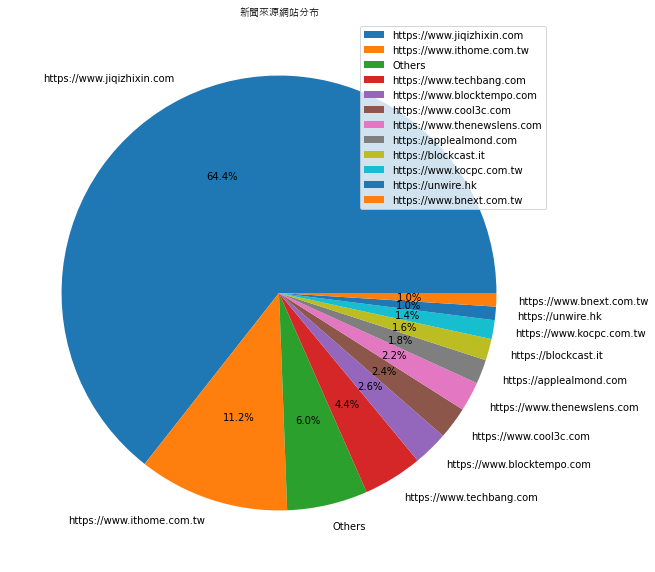

In [17]:
# 新聞來源畫成圓餅圖

import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
# plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(20, 10))
plt.pie(new_origin_state['count'], labels=new_origin_state['new_origin'], autopct='%0.1f%%')
plt.legend(loc='best')
plt.title('新聞來源網站分布', fontproperties="Microsoft JhengHei")
plt.show()

In [18]:
# 把新聞內容轉成獨立串列做進一步處理

news = list(final_news['content'].values)                                 
print(len(news), type(news))

500 <class 'list'>


In [9]:
import jieba
import jieba.analyse

# 移除停用詞
stopwords=[]

with open('new_stopwords.txt', 'r', encoding='utf-8') as f:             # 使用從網路上抓來的停用詞表
    for data in f.readlines():
        data = data.strip()
        stopwords.append(data)

# jieba 分詞
remained_news = []

for n in news:
    seg = jieba.cut(n, cut_all=False)               # 分詞後去除停用詞, 然後再重組回文章
    try:
        remained_news.append(''.join(list(filter(lambda a: a not in stopwords and a != '\n', seg))))
    except Exception as e:                         
        print(e)                                    # 若有 'nan' 的項目會引發錯誤  
        print(news.index(n))                        # 取得序號再次確認新聞內容是否有問題

# 關鍵字 tfidf
keywords = []

for n in remained_news:
    keywords.append(jieba.analyse.extract_tags(n, topK=20, withWeight=False))

for j in keywords:
    print(j)
    print()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\brian\AppData\Local\Temp\jieba.cache
Loading model cost 1.375 seconds.
Prefix dict has been built successfully.


['AI', '阿里', '电商', '算法', '郑俊芳', '模特', '人工智能', '鲁棒性', '清华大学', '多媒体', '模型', '数字', '合作', '驾驶', '张钹', '模态', '基建', '领域', '商家', '识别']

['AI', '达摩院', '律师', '合同', '审核', '人类', 'ALICE', '法务', '交卷', '人机', '语言', '智能', '比赛', '机器', '50', '准确率', '分钟', '风险', '人工智能', '浙江大学']

['内存', '傲腾', '英特尔', 'KGNN', '持久', '快手', 'DRAM', '采样', '存储', '场景', '平台', '算法', '训练', '动态图', 'GNN', '推荐', '提供', '性能', '分片', '级别']

['Line', '服務', '資料', 'AI', '團隊', 'social', 'btn', 'set', '疫情', 'left', '區塊', 'Yahoo', '12', 'block', 'margin', '專案', '2020', 'width', '一個', '線上']

['LG', '手機', '部門', '重組', 'Reuters', '確認', '低階中', '階手', '機設', '計生', '產數量', '就會', '專注', '高階產品', '因應', '架構', '改變', '調任', '減生產', '研發']

['Apple', 'CPU', '核心', 'Pro', 'iMac', '晶片', '2021', '32', '高階桌', 'Mac', 'MacBook', '16', '顯示', '新款', '效能', '大計來', 'M1', '一個', '開端', '發展']

['蘋果', '服務', 'Apple', '使用者', '訂閱', '新機', '硬體', '金額', '產品', '三星', '市場', '內容', '舊機', '透過', 'Google', '舊機換', '00', '方案', '持續', 'Loup']

['免費', 'Google', '下載', '教學', 'WordPress', '匯出', 'Authenticat

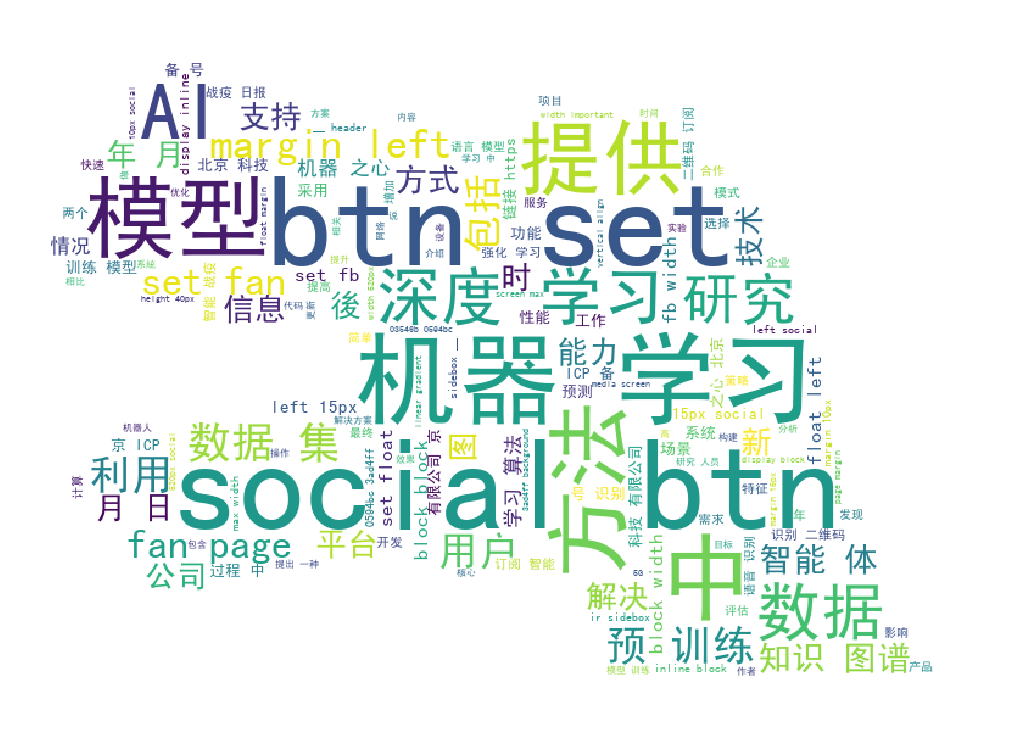

In [10]:
# 把這 500 篇新聞內容做成文字雲

def plt_wordcloud(content, maskpath):                               # 把文章內容轉文字雲
    from wordcloud import WordCloud
    import jieba
    import matplotlib.pyplot as plt
    from PIL import Image 
    import numpy as np
    %matplotlib inline
    
    words = jieba.cut(content, cut_all=False)
    
    all_words = ''
    for word in words:
        all_words += ' '+word
    
    mask = np.array(Image.open(maskpath))
    
    wcloud = WordCloud(width=500, height=500, background_color='white', mask=mask, 
                       min_font_size=8, font_path='simhei.ttf').generate(all_words)
    plt.figure(figsize=(20, 10), facecolor=None)
    plt.imshow(wcloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    
    plt.show()


allnews = ''

for n in remained_news:                                         # 這500篇新聞的總和
    allnews += n

plt_wordcloud(allnews, 'new_trex.jpg')